In [87]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('car data.csv')

In [89]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [90]:
df.shape

(301, 9)

In [91]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [92]:
##check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [93]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [94]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [95]:
final_df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [96]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [97]:
from datetime import date
current_date = date.today()
final_df['Car_Age']=current_date.year - df['Year']

In [98]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [99]:
final_df.drop(['Year'],axis=1,inplace=True)

In [100]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [101]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [102]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [103]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


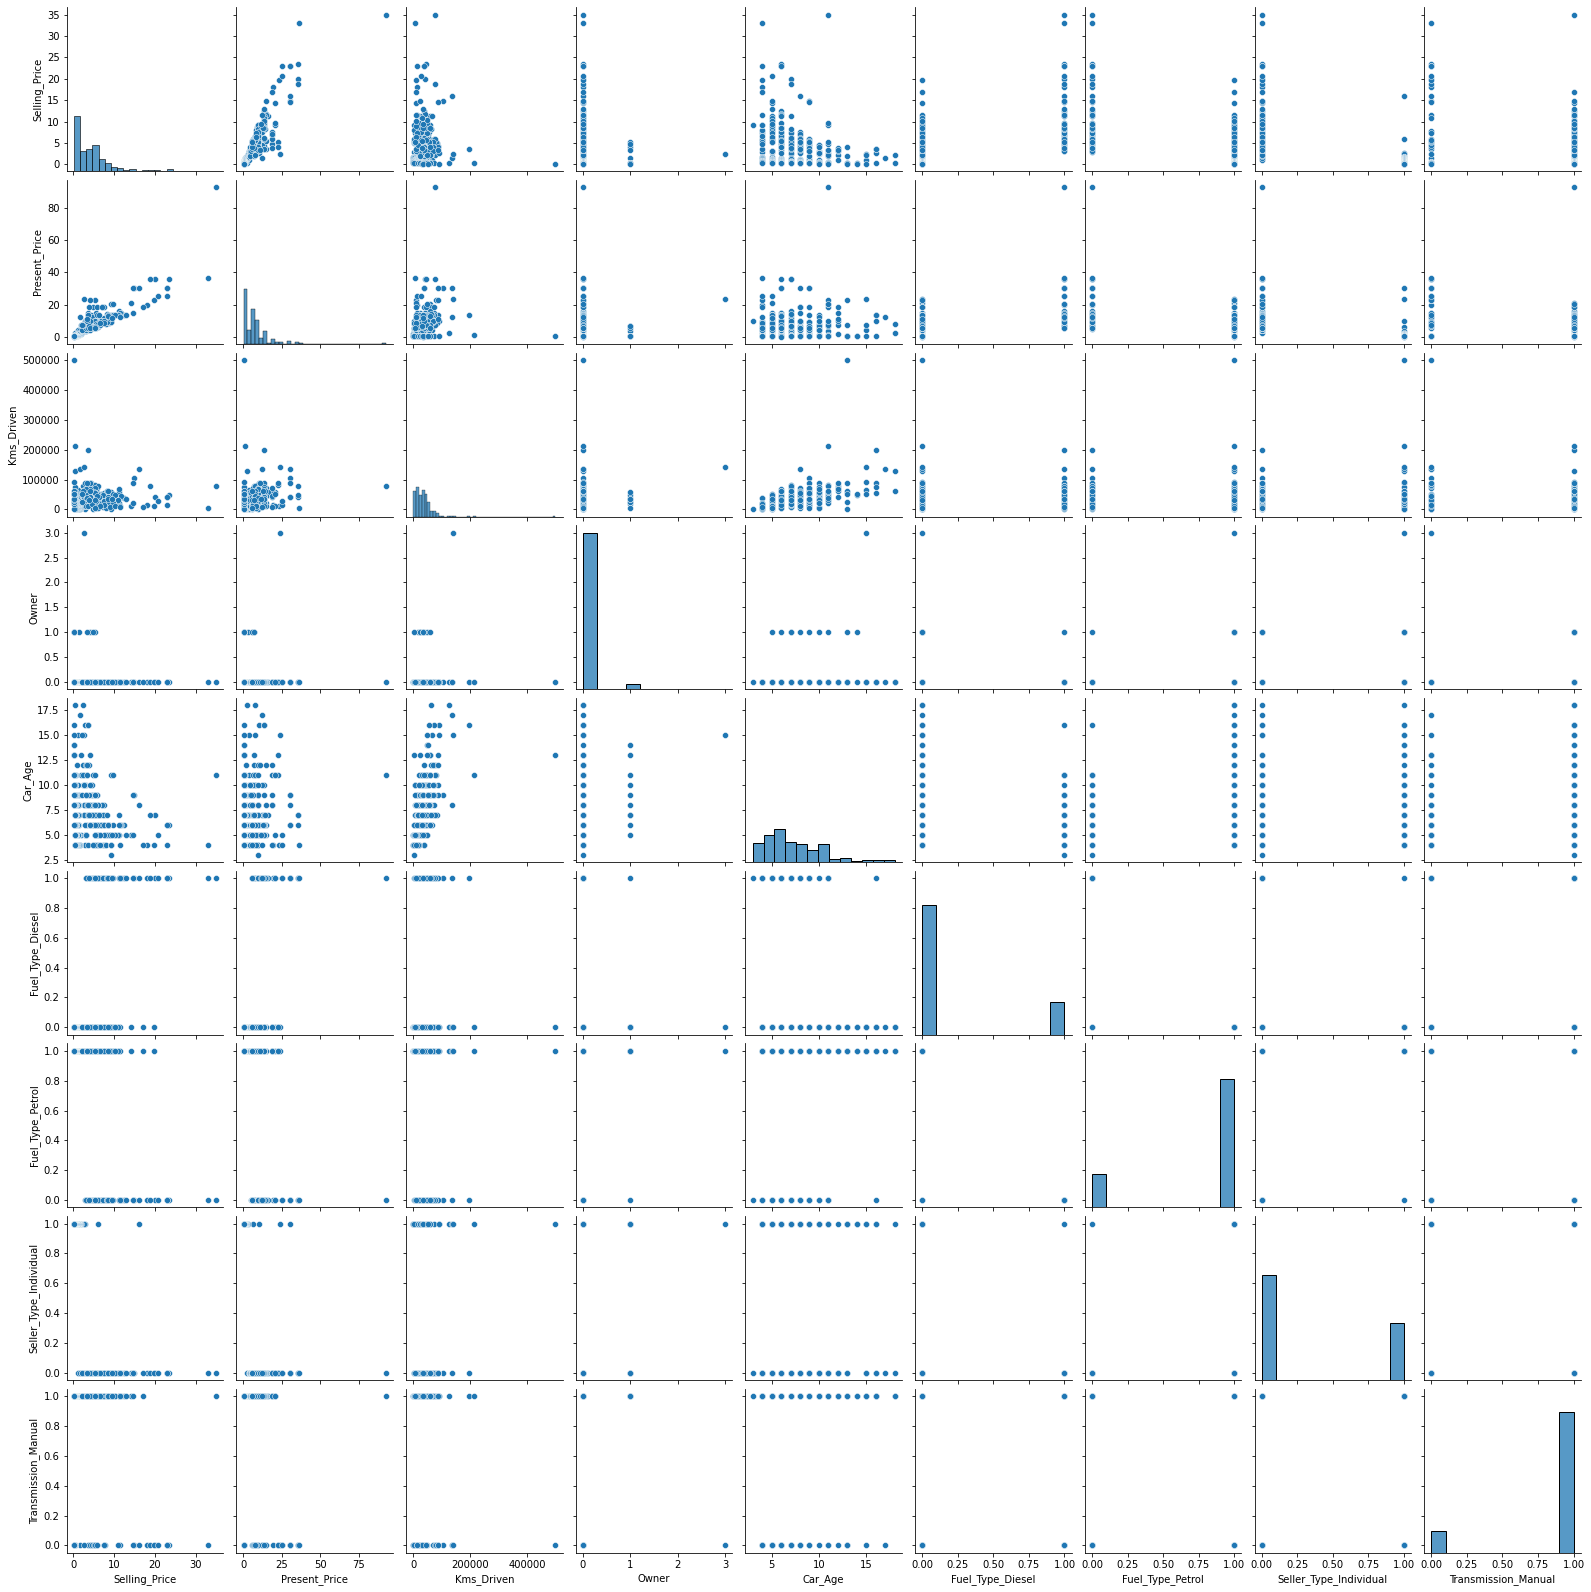

In [104]:
import seaborn as sns
sns.pairplot(final_df)

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

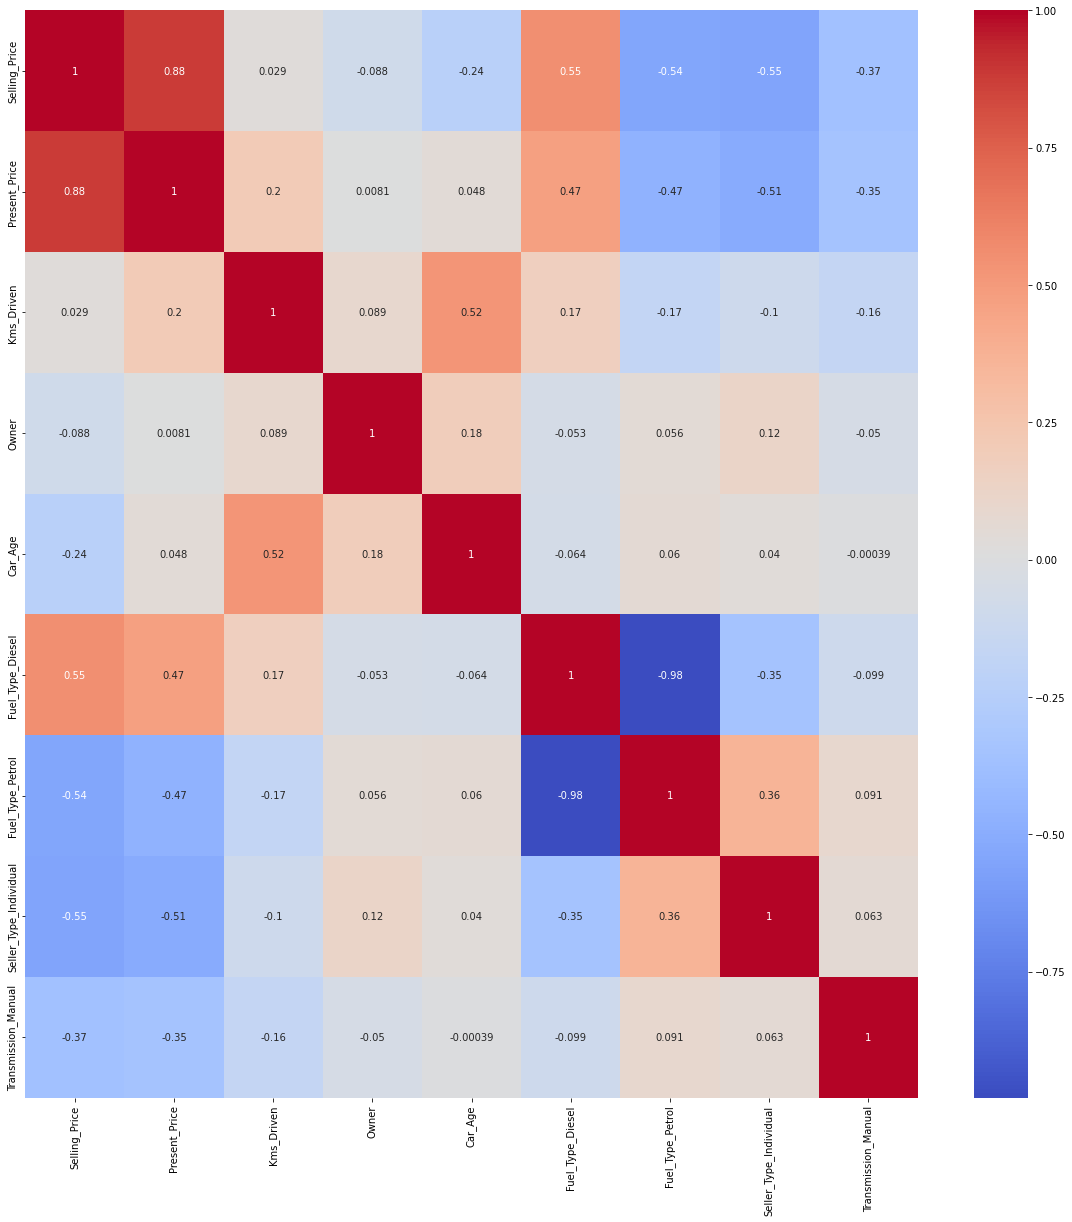

In [106]:
corrmat=final_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
heat=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="coolwarm")

In [107]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [108]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [109]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [110]:
## important features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [111]:
print(model.feature_importances_)

[0.35873522 0.04207898 0.00042251 0.07947067 0.23075986 0.01213717
 0.13333357 0.14306201]


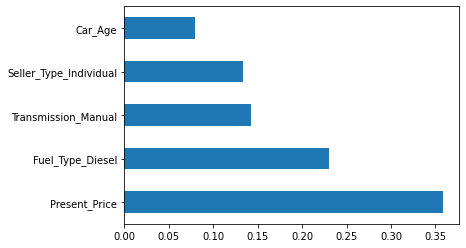

In [112]:
#plot graph of feature importances for better visualization

feature_imp=pd.Series(model.feature_importances_,index=X.columns)
feature_imp.nlargest(5).plot(kind='barh')
plt.show()

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [114]:
X_train.shape

(240, 8)

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [116]:
## Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [117]:
# Randomized Search CV

# no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
#no. of features to consider at every split
max_features=['auto','sqrt']
#maximum no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30, num =12)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
# create the random grid 
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 14, 16, 18, 20, 23, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [120]:
# use the random grid to search for best hyperparameters
# first create the base model to tune
rf=RandomForestRegressor()

In [121]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',
                            n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [122]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=30

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [123]:
predictions=rf_random.predict(X_test)

In [124]:
predictions

array([ 0.51120324,  0.68575975,  9.90761937,  1.19672303, 21.41943686,
       10.79561433,  1.19649204,  0.50886668,  7.40931168,  5.69752074,
        5.90408852,  0.24568692,  8.10518841,  1.37878247,  0.4471896 ,
        5.62686631,  7.67175008,  3.75603734,  0.4735422 ,  3.23730491,
        5.70738526,  0.43527431,  4.39424016,  6.3838389 ,  3.98266095,
        4.06046897,  5.50051699,  0.33298645,  0.43527431, 19.42714902,
        0.6668953 ,  0.7721104 , 11.03189113,  1.20905421,  5.49587802,
        2.98265409,  5.19738948,  5.42405911,  3.00031878,  2.74225064,
        0.40250613,  7.4850352 ,  0.22137454,  5.96377327,  4.65428424,
        0.66568244,  0.26809179,  4.6025056 ,  4.63496598,  4.34885957,
        0.59622134,  2.98465435,  2.7593517 ,  5.57303442,  3.5530203 ,
        4.81612857,  5.05009326, 10.81167465,  2.58512086,  7.7691407 ,
        5.95315456])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

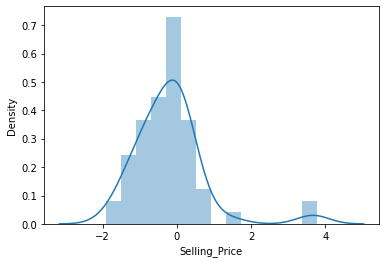

In [125]:
sns.distplot(y_test-predictions)

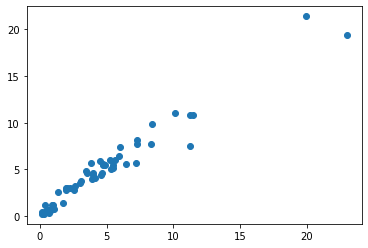

In [127]:
plt.scatter(y_test,predictions)

In [129]:
import pickle
# open a file where you ant to store the data
file=open('random_forest_regression_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random, file)